<a href="https://colab.research.google.com/github/insight4healthlab/course-HH-HLST-4200/blob/main/Python/Notebooks%20/normality_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove the following if you use Jupyter Notebook or other Python IDE

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import necessary libraries
import pandas as pd
# Define the data path (update this if the file is in a different location)
data_path = 'course-HH-HLST-4200/datasets/job_satisfaction.csv'

data_path = '/content/gdrive/MyDrive/' + data_path
# Read the .csv file into a pandas DataFrame
data_frame = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
if data_frame is not None:
    print(data_frame.head())


   Unnamed: 0  Gender   Age  MStatus  Children#  Education  Ethnicity  Yeas#  \
0           0     1.0  37.0      1.0        2.0        1.0        0.0    5.0   
1           1     0.0  56.0      1.0        3.0        1.0        0.0   29.0   
2           2     1.0  32.0      1.0        3.0        1.0        1.0    8.0   
3           3     0.0  30.0      1.0        1.0        1.0        1.0    3.0   
4           4     1.0  41.0      1.0        2.0        1.0        0.0   15.0   

   Location  MStatus_Rec  ...  Salary  Promotion  Autonomy  RoleConflict  \
0       1.0          0.0  ...     8.0       15.0      18.0           5.0   
1       3.0          0.0  ...    18.0       41.0      12.0           7.0   
2       2.0          0.0  ...    28.0       33.0       9.0           9.0   
3       1.0          0.0  ...    35.0       46.0      15.0          10.0   
4       3.0          0.0  ...    20.0       39.0      15.0          10.0   

   Comfort  WorkLoad  AnyChild  North  Center  South  
0     1

In [4]:
data_frame.head()

,Unnamed: 0,Gender,Age,MStatus,Children#,Education,Ethnicity,Yeas#,Location,MStatus_Rec,...,Salary,Promotion,Autonomy,RoleConflict,Comfort,WorkLoad,AnyChild,North,Center,South
0,0,1.0,37.0,1.0,2.0,1.0,0.0,5.0,1.0,0.0,...,8.0,15.0,18.0,5.0,19.0,15.0,1.0,1.0,0.0,0.0
1,1,0.0,56.0,1.0,3.0,1.0,0.0,29.0,3.0,0.0,...,18.0,41.0,12.0,7.0,15.0,14.0,1.0,0.0,0.0,1.0
2,2,1.0,32.0,1.0,3.0,1.0,1.0,8.0,2.0,0.0,...,28.0,33.0,9.0,9.0,14.0,9.0,1.0,0.0,1.0,0.0
3,3,0.0,30.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,...,35.0,46.0,15.0,10.0,10.0,13.0,1.0,1.0,0.0,0.0
4,4,1.0,41.0,1.0,2.0,1.0,0.0,15.0,3.0,0.0,...,20.0,39.0,15.0,10.0,13.0,13.0,1.0,0.0,0.0,1.0



Performing Kolmogorov-Smirnov test for 0      37.0
1      56.0
2      32.0
3      30.0
4      41.0
       ... 
212    32.0
213    45.0
214    44.0
215    43.0
216    43.0
Name: Age, Length: 215, dtype: float64:
Kolmogorov-Smirnov Test Statistic: 0.09442034615354217
P-value: 0.04047259754062871
The 0      37.0
1      56.0
2      32.0
3      30.0
4      41.0
       ... 
212    32.0
213    45.0
214    44.0
215    43.0
216    43.0
Name: Age, Length: 215, dtype: float64 data does not follow a normal distribution (reject H0).


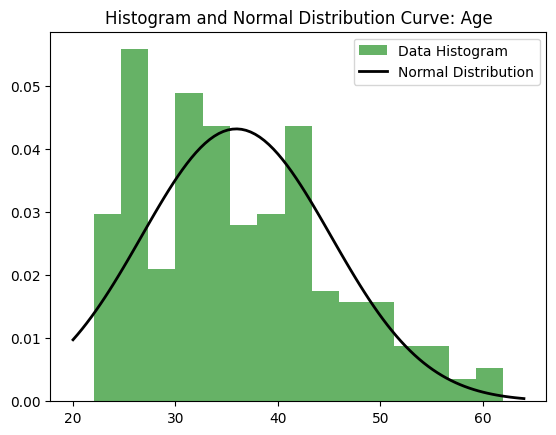

In [8]:
# Perform the Kolmogorov-Smirnov test
from scipy.stats import kstest, norm
import numpy as np
import matplotlib.pyplot as plt

variable_data = data_frame["Age"].dropna()
print(f"\nPerforming Kolmogorov-Smirnov test for {variable_data}:")
D_statistic, p_value = kstest(variable_data, 'norm', args=(np.mean(variable_data), np.std(variable_data)))
print(f"Kolmogorov-Smirnov Test Statistic: {D_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print(f"The {variable_data} data does not follow a normal distribution (reject H0).")
else:
  print(f"The {variable_data} data follows a normal distribution (fail to reject H0).")


plt.hist(variable_data, bins=15, density=True, alpha=0.6, color='g', label='Data Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(variable_data), np.std(variable_data))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title(f"Histogram and Normal Distribution Curve: Age")
plt.legend()
plt.show()